In [1]:
%matplotlib inline
from pylab import *
from sklearn import datasets
from ipywidgets import Button
from IPython.display import display, clear_output
import json

In [2]:
class Trainer:
    def __init__(self, faces):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print(self.index)
                self.index += 1
            return self.index
    
    def record_result(self, face):
        self.results[str(self.index)] = face
        
    def save(self):
        with open('results.xml', 'w') as f:
            json.dump(self.results, f)

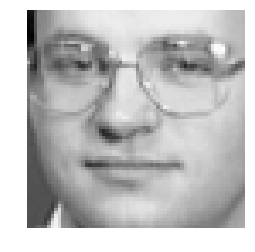

In [3]:
faces = datasets.fetch_olivetti_faces()
trainer = Trainer(faces)
button_smile = Button(description = 'smile')
button_sad = Button(description = 'sad')
button_neutral = Button(description = 'neutral')

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(1)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_sad(b):
    trainer.record_result(-1)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])
    
def update_neutral(b):
    trainer.record_result(0)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_neutral.on_click(update_neutral)
button_sad.on_click(update_sad)
button_smile.on_click(update_smile)

display(button_smile)
display(button_sad)
display(button_neutral)
display_face(trainer.imgs[trainer.index])


In [6]:
trainer.save()